In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
data = pd.read_table('Downloads/fruit_data_with_colors.txt')

In [55]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [56]:
data.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


data.describe()

In [58]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


C:\Users\anvay\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


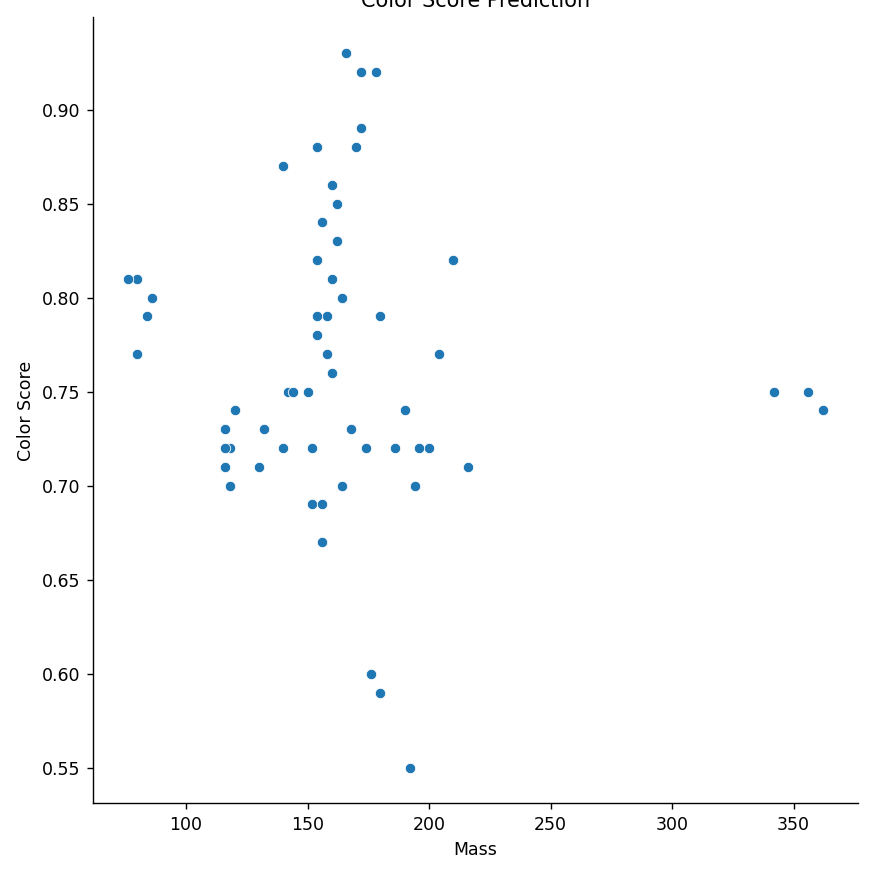

In [59]:

sns.pairplot(data, x_vars=['mass'], y_vars=['color_score'], size=7, kind='scatter')
plt.xlabel('Mass')
plt.ylabel('Color Score')
plt.title('Color Score Prediction')
plt.show()

In [60]:
data.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [61]:
X = data['mass']
y = data['color_score']


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [63]:
print(X_train.shape)

(47,)


In [64]:
print(y_train.shape)

(47,)


In [65]:
import statsmodels.api as sm
X_addC = sm.add_constant(X_train)
model = sm.OLS(y_train, X_addC).fit()

In [66]:
print(X_addC)

    const  height
36    1.0     7.6
31    1.0     8.0
8     1.0     7.8
17    1.0     7.6
6     1.0     4.3
4     1.0     4.6
54    1.0     8.5
19    1.0     7.2
30    1.0     7.5
50    1.0     8.2
44    1.0    10.5
55    1.0     7.7
15    1.0     7.1
9     1.0     7.0
27    1.0     9.2
26    1.0     9.2
16    1.0     7.5
24    1.0     9.4
33    1.0     8.1
56    1.0     8.1
41    1.0     8.2
11    1.0     7.6
32    1.0     7.0
52    1.0     8.0
40    1.0     7.5
37    1.0     7.3
29    1.0     7.4
43    1.0    10.3
1     1.0     6.8
21    1.0     7.4
2     1.0     7.2
46    1.0    10.2
39    1.0     7.4
35    1.0     7.9
23    1.0     7.9
48    1.0    10.1
10    1.0     7.3
22    1.0     7.1
18    1.0     7.1
58    1.0     8.1
20    1.0     7.5
7     1.0     4.0
42    1.0     7.2
14    1.0     7.3
28    1.0     7.1
51    1.0     7.5
38    1.0     7.8


In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            color_score   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.960
Date:                Fri, 17 Mar 2023   Prob (F-statistic):             0.0922
Time:                        21:54:31   Log-Likelihood:                 56.186
No. Observations:                  47   AIC:                            -108.4
Df Residuals:                      45   BIC:                            -104.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8835      0.067     13.187      0.000       0.749       1.018
height        -0.0148      0.009     -1.720      0.092      -0.032       0.003
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.547
Skew:                          -0.028   Prob(JB):                        0.761
Kurtosis:                       3.525   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(model.rsquared, model.rsquared_adj)

0.061720228196369575 0.040869566600733376


In [73]:
from sklearn.linear_model import linearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.array(X_train).reshape((-1, 1))
model = LinearRegression().fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot()

plt.scatter(X_train, y_train, color='g')
plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, model.predict(X_train), color='r')
ax.text(1, 4, r'LR equation: $Y = a + bX$', fontsize=10)

print(model.coef_[0], model.intercept_)

ImportError: cannot import name 'linearRegression' from 'sklearn.linear_model' (C:\Users\anvay\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [75]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)

In [76]:
X_test['Prediction'] = y_pred
X_test['y_test'] = y_test

In [79]:
X_test

0                                                           7.3
5                                                           4.3
34                                                          7.8
13                                                          7.7
45                                                          9.2
53                                                          8.4
57                                                          8.5
25                                                          9.2
47                                                          9.7
12                                                          7.1
49                                                          8.7
3                                                           4.7
Prediction    0     0.775516
5     0.819900
34    0.768119
1...
y_test        0     0.55
5     0.77
34    0.75
13    0.70
45...
Name: height, dtype: object